python code given by `gemini`

In [1]:
!cd 

C:\Users\p2p2l\projects\wgong\py4kids\lesson-99-misc\google-search


## Method 1: Using the google-search-results library


Not Working

In [7]:
!pip install google-search-results

In [9]:
from serpapi import GoogleSearch

# Define your search query
search_term = "baidu 气"  # Replace "气" with the desired character

# Set API key (get yours from https://serpapi.com/)
#api_key = "6de3838115ca27eccc7c39e93fb8811fddff95d5"

# Perform Google search
search = GoogleSearch(engine="google")
results = search.get_dict(q=search_term)

# Extract the first Baidu search result URL (modify if needed)
if results.get("organic_results"):
    first_result = results["organic_results"][0]
    if first_result.get("link") and "baidu.com" in first_result["link"]:
        baidu_url = first_result["link"]
        print(f"Baidu URL for character '{search_term[1]}': {baidu_url}")
else:
    print(f"No Baidu results found for '{search_term[1]}'")

TypeError: __init__() got an unexpected keyword argument 'engine'

## Method 2: Using the requests library and parsing HTML

In [1]:
!pip install requests

In [2]:
import requests
from bs4 import BeautifulSoup  # For parsing HTML
from time import sleep

# Define your search query
search_term = "baidu 气"  # Replace "气" with the desired character
google_search_url = f"https://www.google.com/search?q={search_term}"

# Perform Google search
response = requests.get(google_search_url)

# Parse HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find the first Baidu search result (modify logic if needed)
for link in soup.find_all("a"):
    if link.get("href") and "baidu.com" in link.get("href"):
        baidu_url = link.get("href")
        print(f"Baidu URL for character '{search_term[1]}': {baidu_url}")
        break  # Stop after finding the first Baidu result
else:
    print(f"No Baidu results found for '{search_term[1]}'")

Baidu URL for character 'a': /url?q=https://baike.baidu.com/item/%25E6%25B0%2594/35794&sa=U&ved=2ahUKEwi0oufen6OIAxU5QjABHa0HAbEQFnoECAsQAg&usg=AOvVaw05apJkqPki9BhcTO5m9w-Y


above URL does not work

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>baidu 气 - Google Search</title><script nonce="pUTRbikb6BrAP-t4SwPVrQ">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a=c==="1"||c==="q"&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if(a.tagName==="A"){a=a.getAttribute("data-nohref")==="1";break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){window.google=window.google||{};var a=window.performance&&window.performance.timing&&"navigationStart"in window.performance.timing,b=google.stvsc&&google.stvsc.ns,c=a?b||window.performance.timing.navigationStart:void 0,d=google.stvsc&&google.stvsc.rs,f=a?d||window
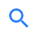

In [3]:
soup 

In [6]:
with open("baidu.html", "w", encoding="utf-8") as f:
    f.write(str(soup))

## Method-3: Ask Claude

Revised by myself to get it working

In [59]:
import requests
from urllib.parse import quote
from time import sleep

def parse_baidu_url(s):
    return s.split("q=")[1].split("&sa=")[0]

def get_baidu_url(character):
    ret_val = ""
    # Encode the Chinese character for use in the URL
    encoded_char = quote(character)
    
    # Construct the Baidu search URL
    search_url = f"https://www.google.com/search?q={encoded_char}%09baidu"
    
    # Send a GET request to the Baidu API
    response = requests.get(search_url)
    
    # Check if the request was successful
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        a_list = soup.find_all("a")
        x = [link.get("href") for link in a_list if link.text.startswith(f"{character}_百度百科")]
        return parse_baidu_url(x[0]) if x else ret_val
    
    return ret_val

### Testing

In [60]:
# Example usage
data = []
for ch in ["气",  "月", "女", "心"]:
    url = get_baidu_url(ch)
    data.append([ch, url])
    sleep(2)

In [61]:
data

[['气', 'https://baike.baidu.com/item/%25E6%25B0%2594/35794'],
 ['月', ''],
 ['女', 'https://baike.baidu.com/item/%25E5%25A5%25B3/507533'],
 ['心', 'https://baike.baidu.com/item/%25E5%25BF%2583/32430']]

### get baidu zi URL

after doing a few manual search, I was able to automate the process for the remaining Zi from 

file = C:\Users\p2p2l\projects\wgong\zistory\acap-book\docs\360-zi-category-v2.xlsx

In [62]:
s = """央
对
少
左
幺
弱
强
比
热
短
老
近
远
长
高
义
之
乎
勿
句
吾
它
尔
弗
矣
空
者
而
词
通
章
无
字
不
兔
兽
灵
牛
禽
虎
蛇
豕
象
鹿
鼠
龙
飞
了
亡
体
唇
头
存
尾
死
毛
牙
生
皮
眉
肉
脑
臼
舌
血
身
颈
骨
鼻
齿
七
万
三
丑
丙
乘
乙
九
二
五
亥
亿
兆
六
减
千
午
卯
四
壬
寅
巳
庚
戊
戌
数
未
法
甲
申
癸
百
穷
算
辛
辰
除
零
云
光
声
天
川
星
气
电
风
叶
杉
杨
松
林
果
枝
柏
柳
树
根
瓜
花
芽
茎
豆
麦
业
丰
为
乐
书
井
产
仓
企
住
作
写
农
出
和
品
商
器
国
学
屯
市
乡
文
术
机
止
永
甘
画
省
缶
艺
谷
采
音
饮
加
兵
行
军
刃
勾
匕
卫
叉
太
宁
安
将
平
矛
矢
求
买
亏
兑
利
卖
去
失
币
应
有
来
润
舟
运
丫
主
亲
仆
仙
儿
兄
公
凡
友
君
圣
奴
妹
姐
寻
弟
当
情
易
朋
母
民
父
知
神
臣
丁
己
自
世
东
中
久
今
冬
北
南
历
古
史
夏
宇
宙
年
春
界
秋
西
丈
两
个
克
包
匹
升
单
双
尺
度
斗
时
秒
计
里"""


In [63]:
data2 = []
for ch in s.split("\n"):
    url = get_baidu_url(ch)
    data2.append([ch, url])
    sleep(2)

In [65]:
len(data2), len(s.split("\n"))

(267, 267)

In [66]:
data2

[['央', 'https://baike.baidu.com/item/%25E5%25A4%25AE/6342485'],
 ['对', 'https://baike.baidu.com/item/%25E5%25AF%25B9/29687'],
 ['少', 'https://baike.baidu.com/item/%25E5%25B0%2591/1402355'],
 ['左', 'https://baike.baidu.com/item/%25E5%25B7%25A6/34238'],
 ['幺', 'https://baike.baidu.com/item/%25E5%25B9%25BA/189957'],
 ['弱', 'https://baike.baidu.com/item/%25E5%25BC%25B1/3633807'],
 ['强', 'https://baike.baidu.com/item/%25E5%25BC%25BA/4177'],
 ['比', 'https://baike.baidu.com/item/%25E6%25AF%2594/31911'],
 ['热', 'https://baike.baidu.com/item/%25E7%2583%25AD/84386'],
 ['短', 'https://baike.baidu.com/item/%25E7%259F%25AD/1402696'],
 ['老', 'https://baike.baidu.com/item/%25E8%2580%2581/6295260'],
 ['近', 'https://baike.baidu.com/item/%25E8%25BF%2591/18670'],
 ['远', 'https://baike.baidu.com/item/%25E8%25BF%259C/84526'],
 ['长', 'https://baike.baidu.com/item/%25E9%2595%25BF/24168'],
 ['高', 'https://baike.baidu.com/item/%25E9%25AB%2598/16270'],
 ['义', 'https://baike.baidu.com/item/%25E4%25B9%2589/34160']

### Save results 

file = C:\Users\p2p2l\projects\wgong\zistory\acap-book\docs\360-zi-category-v3.xlsx

In [69]:
import pandas as pd 

In [70]:
df = pd.DataFrame(data2, columns=["zi", "baidu_url"])

In [72]:
df.to_excel("360-zi-category-v3.xlsx", index=False)

In [73]:
!cd 

C:\Users\p2p2l\projects\wgong\py4kids\lesson-99-misc\google-search


In [67]:
manual_zi = [x[0] for x in data2 if not x[1]]

In [68]:
manual_zi

['存', '脑', '币', '弟']

## Unrelated to baidu URL, but `cnchar` is an excellent lib

In [32]:
s = """
cnchar-poly cnchar-order cnchar-trad 
cnchar-draw cnchar-idiom cnchar-xhy 
cnchar-radical cnchar-words cnchar-explain 
cnchar-voice cnchar-random cnchar-code 
cnchar-input cnchar-info cnchar-name
"""

l = [x.strip() for x in s.split("\n") if x.strip()]

l2 = []
for x in l:
    l2.extend(x.split())
print("\n".join(sorted(l2)))

cnchar-code
cnchar-draw
cnchar-explain
cnchar-idiom
cnchar-info
cnchar-input
cnchar-name
cnchar-order
cnchar-poly
cnchar-radical
cnchar-random
cnchar-trad
cnchar-voice
cnchar-words
cnchar-xhy
